# Animal Classification - The Oxford-IIIT Pet Dataset

**Submission deadline: Friday 21 April, 11:55pm**

**Assessment weight: 15% of the total unit assessment.**

**Versions**
  - 2023-03-27 V1.0: Initial release

*Unless a Special Consideration request has been submitted and approved, a 5% penalty (of the total possible mark of the task) will be applied for each day a written report or presentation assessment is not submitted, up until the 7th day (including weekends). After the 7th day, a grade of ‘0’ will be awarded even if the assessment is submitted. The submission time for all uploaded assessments is **11:55 pm**. A 1-hour grace period will be provided to students who experience a technical concern. For any late submission of time-sensitive tasks, such as scheduled tests/exams, performance assessments/presentations, and/or scheduled practical assessments/labs, please apply for [Special Consideration](https://students.mq.edu.au/study/assessment-exams/special-consideration).*

In this assignment you will complete tasks for an end-to-end image classification application. We will train and test the data using the Oxford-III Pet Dataset:

- https://www.robots.ox.ac.uk/~vgg/data/pets/

This is a small dataset with 37 breeds of cats and dogs. Please download the image files and annotations from the above link, and unzip it on your work directory. This will create the following two directories:

- `images` - Images saved as jpg files, one file per image.
- `annotations` - Image annotations for image segmentation, object detection, and image classification. The annotations are explained in the file `annotations/README`. Please read the file so that you understand how to use these annotations. In this assignment, we will only use the annotations for image classification.

# Connect to GitHub Classroom

Please follow these steps to connect:

1. Follow this invitation link and accept the invitation: https://classroom.github.com/a/LuWneNQe
2. The link may ask you to sign in to GitHub (if you haven't signed in earlier). If you don't have a GitHub account, you will need to register.
3. Once you have logged in with GitHub, you may need to select your email address to associate your GitHub account with your email address (if you haven't done it in a previous COMP3420 activity). If you can't find your email address, please skip this step and contact diego.molla-aliod@mq.edu.au so that he can do the association manually.
4. Wait a minute or two, and refresh the browser until it indicates that your assignment repository has been created. Your repository is private to you, and you have administration privileges. Only you and the lecture will have access to it. The repository will be listed under the list of repositories belonging to this offering of COMP3420: https://github.com/orgs/COMP3420-2023S1/repositories
5. In contrast with assignment 1 and the practical sessions, your assignment repository will be empty and will not include starter code. you need to add this Jupyter notebook and commit the changes.

Please use the github repository linked to this GitHub classroom. Make sure that you continuously push commits and you provide useful commit comments. **1 mark of the assessment of this assignment is related to good practice with the use of GitHub.**


## Task 1 (4 marks) - Data preparation and exploration

### 1.1 (1 mark)

The `annotations` directory has the files `trainval.txt` and `test.txt`. Write Python code that counts the number of samples for each of the 37 categories in each of these files. In a MarkDown text cell, answer these questions, providing a justification:

1. Are the data balanced? Comment on whether there are any categories with an unusually large or small number of samples, relative to the other categories.
2. Are there any significant differences in the distribution of categories in `trainval.txt` with respect to `test.txt`?

In [8]:
import numpy as np
import pandas as pd
import collections
from collections import Counter
import os

# Define function to read data into Python

def read_file(filepath):
    
    with open(filepath) as f:
        lines = f.readlines()
    
    return lines

# read data into Python
train_data = read_file("annotations/trainval.txt")
test_data = read_file("annotations/test.txt")

def count(data):
    labels = [line.rsplit("_", 1)[0] for line in data] # extract labels from data
    label_counts = dict(sorted(Counter(labels).items())) # count occurrences of each label and sort by label
    return label_counts

# Counting the number of samples in both datasets per category
training_count = count(train_data)
test_count = count(test_data)

# Extracting the categories to combine counts on
categories = list(training_count.keys())

# Combining counts on categories
combined_counts = pd.DataFrame({'Category': categories,
                                'Train Count': [training_count.get(cat, 0) for cat in categories],
                                'Test Count': [test_count.get(cat, 0) for cat in categories]})
# Displaying the combined counts
print(combined_counts)


                      Category  Train Count  Test Count
0                   Abyssinian          100          98
1                       Bengal          100         100
2                       Birman          100         100
3                       Bombay           96          88
4            British_Shorthair          100         100
5                 Egyptian_Mau           93          97
6                   Maine_Coon          100         100
7                      Persian          100         100
8                      Ragdoll          100         100
9                 Russian_Blue          100         100
10                     Siamese           99         100
11                      Sphynx          100         100
12            american_bulldog          100         100
13   american_pit_bull_terrier          100         100
14                basset_hound          100         100
15                      beagle          100         100
16                       boxer          100     

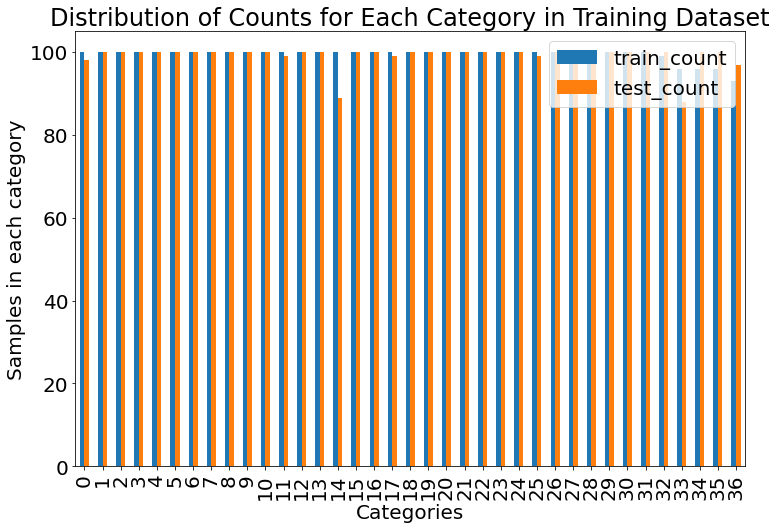

In [107]:
import matplotlib
import matplotlib.pyplot as plt
# Plot the distribution of counts for each category in a bar chart
fig, ax = plt.subplots(figsize=(12,8))
class_counts.plot(kind='bar', ax=ax)
ax.set_xlabel("Categories")
ax.set_ylabel("Samples in each category")
ax.set_title("Distribution of Counts for Each Category in Training Dataset")
plt.show()

1. The data appears to be relatively balanced, as each category has 100 samples in the training dataset and most categories have 100 samples in the test dataset. However, there are a few categories with slightly fewer samples, such as Siamese, Bombay, English Cocker Spaniel, Newfoundland, and Egyptian Mau, which have 99, 96, 96, 96, and 93 samples in the training dataset, respectively. Staffordshire Bull Terrier also has only 89 samples in the test dataset, which is significantly lower than the other categories.

2. Regarding the distribution of categories between the training and test datasets, there are some differences, as seen in the provided dataframe. In particular, some categories such as Staffordshire Bull Terrier, Keeshond, Siamese, Bombay, and Egyptian Mau have fewer samples in the test dataset than in the training dataset. Additionally, some categories such as Scottish Terrier and American Pit Bull Terrier have one less sample in the test dataset than in the training dataset. However, these differences are generally minor and should not significantly affect the ability of a model trained on the training dataset to perform well on the test dataset.

### 1.2 (1 mark)

Display 10 random images from the "trainval" data and the "test" data.

In [133]:
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

def display_random_images(file_path, num_images, rows, cols):
    # Extract image names from the file list and store in 'image_names' list
    image_names = []
    with open(file_path, 'r') as f:
        for line in f:
            image_names.append(line.strip().split()[0])

    # Randomly select desired number of images from the image list
    selected_indices = random.sample(range(len(image_names)), k=num_images)
    selected_images = [image_names[i] for i in selected_indices]

    # Create a figure with subplots
    fig, axs = plt.subplots(nrows=rows, ncols=cols, figsize=(25, 15))

    # Display each selected image in a subplot
    for i, image_name in enumerate(selected_images):
        # Load the image
        image_path = f"images/{image_name}.jpg"
        image = Image.open(image_path)

        # Add image to a subplot
        axs[i // cols][i % cols].imshow(image)
        axs[i // cols][i % cols].set_title(image_name)

    # Adjust the spacing between subplots
    plt.tight_layout(pad=2.0)
    plt.show()


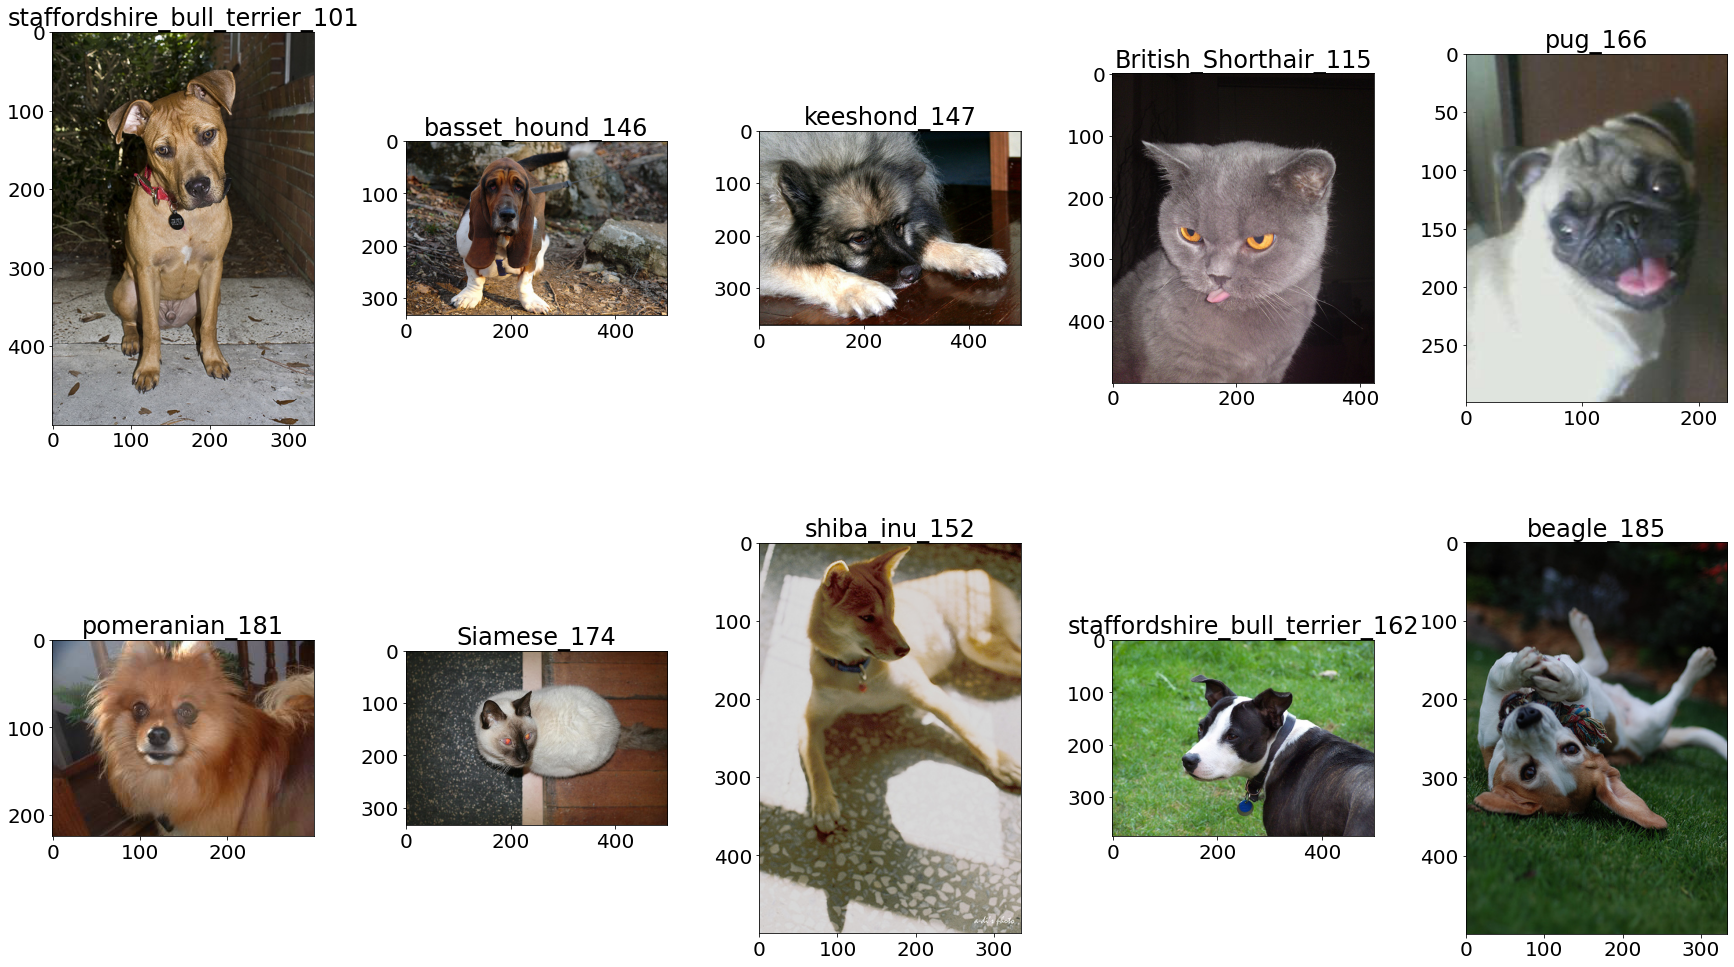

In [134]:
# Images from training dataset
display_random_images("annotations/trainval.txt", 10, 2, 5)


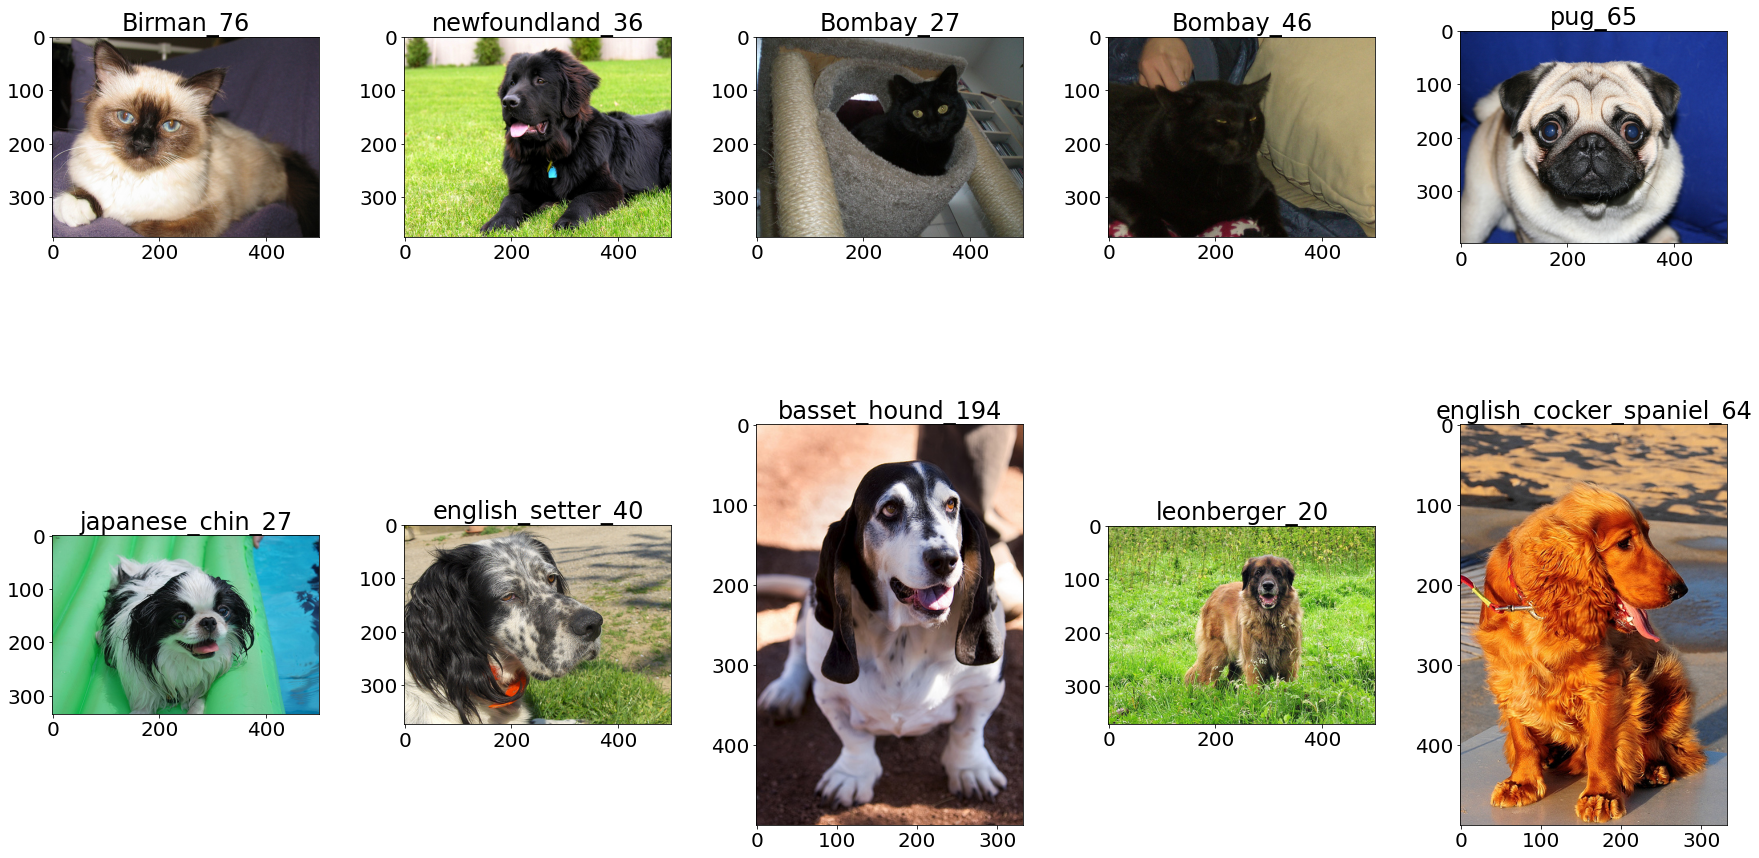

In [135]:
# Images from testing dataset
display_random_images("annotations/test.txt", 10, 2, 5)


### 1.3 (1 mark)

Split the `annotations/test.txt` list of files into `validation.txt` and `newtest.txt` so that half of the items in each category falls into `validation.txt`, and the other half into `newtest.txt`. It is up to you how to do the splitting, but make sure that the distribution of categories in each is similar. Show the distribution of category counts on the resulting `validation.txt` and `newtest.txt` to demonstrate that the distribution of category counts is half/half.

To facilitate the next tasks, make sure that the files `validation.txt` and `newtest.txt` contain the full path of the image files relative to the folder where this notebook is located, for example, the first lines of `validation.txt` might be like this:

```
images/Abyssinian_99.jpg 1 1 1
images/Abyssinian_25.jpg 1 1 1
images/Abyssinian_78.jpg 1 1 1
images/Abyssinian_86.jpg 1 1 1
```

Also to facilitate the next tasks of this assignment, write Python code that rewrites the contents of `annotations/trainval.txt` into a new file `training.txt` that also contains the full relative path of the images.

The following are sample files. Your files should look similar to these.
- [`training.txt`](training.txt)
- [`validation.txt`](validation.txt)
- [`newtest.txt`](newtest.txt)

In [198]:
# Writing the trainval file as training.txt
with open('annotations/trainval.txt', 'r') as f:
    lines = f.readlines()

with open('annotations/training.txt', 'w') as f:
    for line in lines:
        fields = line.split()
        image_name = f"images/{fields[0]}.jpg"
        output_line = f"{image_name} {' '.join(fields[1:])}\n"
        f.write(output_line)


In [199]:
# Changing the test file from name to paths before splitting
with open('annotations/test.txt', 'r') as f:
    lines = f.readlines()

with open('annotations/updated_test.txt', 'w') as f:
    for line in lines:
        fields = line.split()
        image_name = f"images/{fields[0]}.jpg"
        output_line = f"{image_name} {' '.join(fields[1:])}\n"
        f.write(output_line)


In [203]:
# Reading the updated test data into python
up_test_data = read_file('annotations/updated_test.txt')

In [205]:
# Define a function to group the image paths by categories
def group_by_categories(data, category):
    return [image_path for image_path in data if image_path.startswith(f"images/{category}_")]

# Group the image paths by categories
grouped_image_paths = {}
for category in categories:
    grouped_image_paths[category] = group_by_categories(up_test_data, category)


In [228]:
# The total number of samples in the test data for each category divided by two to equally allocate to validation and newtest
half_count = {}
for category in categories:
    half_count[category] = test_count[category] // 2

# New Datasets to populate    
validation = []
newtest = []

# Shuffling and dividing
for category in categories:
    categorised_images = group_by_categories(up_test_data, category)
    random.shuffle(categorised_images)  # shuffle the images
    validation += categorised_images[:half_count[category]]
    newtest += categorised_images[half_count[category]:]

with open("annotations/validation.txt", "w") as f:
        f.writelines(validation)
        
with open("annotations/newtest.txt", "w") as f:
        f.writelines(newtest)

In [230]:
# Showing counts in each category
newtest_category_count = count(read_file("annotations/newtest.txt"))
validation_category_count = count(read_file("annotations/validation.txt"))

print(newtest_category_count)
print (validation_category_count)

{'images/Abyssinian': 49, 'images/Bengal': 50, 'images/Birman': 50, 'images/Bombay': 44, 'images/British_Shorthair': 50, 'images/Egyptian_Mau': 49, 'images/Maine_Coon': 50, 'images/Persian': 50, 'images/Ragdoll': 50, 'images/Russian_Blue': 50, 'images/Siamese': 50, 'images/Sphynx': 50, 'images/american_bulldog': 50, 'images/american_pit_bull_terrier': 50, 'images/basset_hound': 50, 'images/beagle': 50, 'images/boxer': 50, 'images/chihuahua': 50, 'images/english_cocker_spaniel': 50, 'images/english_setter': 50, 'images/german_shorthaired': 50, 'images/great_pyrenees': 50, 'images/havanese': 50, 'images/japanese_chin': 50, 'images/keeshond': 50, 'images/leonberger': 50, 'images/miniature_pinscher': 50, 'images/newfoundland': 50, 'images/pomeranian': 50, 'images/pug': 50, 'images/saint_bernard': 50, 'images/samoyed': 50, 'images/scottish_terrier': 50, 'images/shiba_inu': 50, 'images/staffordshire_bull_terrier': 45, 'images/wheaten_terrier': 50, 'images/yorkshire_terrier': 50}
{'images/Aby

### 1.4 (1 mark)

Use TensorFlow's `TextLineDataset` to generate datasets for training, validation, and test. The datasets need to produce images that are re-sized to dimensions 200x200, and the values of the pixels are normalised to the range [0, 1]. For this task and following tasks in this assignment, use the files we provide:

- [`training.txt`](training.txt)
- [`validation.txt`](validation.txt)
- [`newtest.txt`](newtest.txt)

In [1]:
from tensorflow.keras import layers, models
import kerastuner as kt
import re
import logging
import random
import tensorflow as tf
from tensorflow.keras.utils import load_img, img_to_array


# Set the filenames for the input files
train_file = "training.txt"
val_file = "validation.txt"
test_file = "newtest.txt"

# Define a function to parse the image data
def parse_image(line):
    # Split the line into its components
    line = tf.strings.split(line)
    filename = line[0]
    label = tf.strings.to_number(line[1], out_type=tf.int32) - 1

    # Load the image file
    image = tf.io.read_file(filename)
    image = tf.image.decode_jpeg(image, channels=3)

    # Resize the image to 200x200
    image = tf.image.resize(image, (200, 200))

    # Normalize the pixel values to the range [0, 1]
    image = tf.cast(image, tf.float32) / 255.0

    return image, label

# Define the batch size and number of epochs
batch_size = 50
num_epochs = 10

# Create the training dataset
train_dataset = tf.data.TextLineDataset(train_file)
train_dataset = train_dataset.map(parse_image, num_parallel_calls=tf.data.AUTOTUNE)
train_dataset = train_dataset.shuffle(buffer_size=10000)
training = train_dataset.batch(batch_size)

# Create the validation dataset
val_dataset = tf.data.TextLineDataset(val_file)
val_dataset = val_dataset.map(parse_image, num_parallel_calls=tf.data.AUTOTUNE)
validation = val_dataset.batch(batch_size)

# Create the test dataset
test_dataset = tf.data.TextLineDataset(test_file)
test_dataset = test_dataset.map(parse_image, num_parallel_calls=tf.data.AUTOTUNE)
testing = test_dataset.batch(batch_size)


2023-05-01 01:32:59.424671: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
/var/folders/hr/ltz1hq1s0cq42_h_rln5pgl00000gn/T/ipykernel_9732/2139443921.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  import kerastuner as kt
2023-05-01 01:33:11.085008: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
training

<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [3]:
validation

<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [4]:
testing

<BatchDataset element_spec=(TensorSpec(shape=(None, 200, 200, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

## Task 2 (4 marks) - A simple classifier

Implement a simple classifier that uses these layers. You need to decide a reasonable ordering of the layers, and reasonable values of the various parameters in each layer.

- Dense layers.
- Dropout.
- Final classification.

The task will be composed of the following subtasks.

### 2.1 (2 marks)

Create a simple model that just contains the following two layers:

- A `Flatten` layer.
- The output layer with the correct size and activation function.

Then, train the model with the training data. Use the validation data to determine when to stop training. Determine whether the system is overfitting and at what point in the training stage (if it is overfitting).

Finally, test the trained model on the test data and report the accuracy results.

Do not worry if you see error messages of the form "corrupt JPEG data". The reason for this is that some of the images are not in the JPEG format. Feel free to remove these images (a web search will help you find the images from this set that do not have the correct JPEG format), or just ignore the errors.

Also, you will probably obtain a very low accuracy, don't worry about that. Later you will try to improve it.

In [5]:
'''Helper functions to plot graph (code from lecture materials)'''
import matplotlib.pylab as plt

def training_plot(metrics, history):
    f, ax = plt.subplots(1, len(metrics), figsize=(5*len(metrics), 5))
    for idx, metric in enumerate(metrics):
        ax[idx].plot(history.history[metric], ls='dashed')
        ax[idx].set_xlabel("Epochs")
        ax[idx].set_ylabel(metric)
        ax[idx].plot(history.history['val_' + metric]);
        ax[idx].legend([metric, 'val_' + metric])


In [10]:
# Define the input shape of the images
input_shape = (200, 200, 3)

# Define the number of output categories
num_categories = 37

# Define a function to create the simple model
def create_simple_model(input_shape, num_categories):
    # Initialize the model
    model = models.Sequential()
    
    # Add a flatten layer
    model.add(layers.Flatten(input_shape=input_shape))
    
    # Add an output layer with num_categories nodes and softmax activation
    model.add(layers.Dense(num_categories, activation="softmax"))
    
    return model

# Create the simple model
simple_model = create_simple_model(input_shape, num_categories)

# Compile the model
simple_model.compile(
    optimizer="rmsprop",
    loss="categorical_crossentropy",
    metrics=["accuracy"]
)

# Show model summary
simple_model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 120000)            0         
                                                                 
 dense_1 (Dense)             (None, 37)                4440037   
                                                                 
Total params: 4,440,037
Trainable params: 4,440,037
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fitting the model

# fit the model
simple_model_fitting = simple_model.fit(
    training, validation_data = validation, epochs=10,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=2)]
)

In [89]:
# Evaluate the model on the testing set
test_results = simple_model.evaluate(testing, verbose=0)

# Print the results
print(f'The value of the loss function is: {test_results[0]:.4f}')
print(f'The testing accuracy is: {test_results[1]:.2%}')


The value of the loss function is: 112.5837
The testing accuracy is: 3.48%


Overfitting is the phenomenon where the model learns specific details of the training dataset that are not present in the overall data or validation dataset, leading to high accuracy and low loss for training data, but poor performance for the validation set.

On the other hand, in this particular model, underfitting is occurring because it is too simplistic. Underfitting happens when the model fails to learn the common patterns in the training data, which causes both the training and validation sets to have high loss and poor accuracy. Based on the graph, we can observe that the training loss is high and variable, while the training accuracy is low. Additionally, the validation loss and accuracy also display some variability.

### 2.3 (1 mark)

Try a more complex architecture that has an additional hidden layer with dropout. For this more complex architecture, try various values of parameters including the following: 

- Hidden layer size
- Dropout rate
- Learning rate

For this, use `keras-tuner` and run it with a reasonable choice of possible parameters and report on the optimal parameters and final evaluation results.

In a separate Markdown text cell, justify your choice of potential parameters.

Use the best model obtained here to report the evaluation results on the test data.

In [14]:
import tensorflow as tf
import kerastuner as kt
import numpy as np
import matplotlib.pyplot as plt


# Define the function to build the neural network model
def build_model(hp):
    # Define the hyperparameters search space
    num_hidden = hp.Int('num_hidden', min_value=32, max_value=320, step=10)
    lrate = hp.Float('learning_rate', min_value=1e-5, max_value=1e-2, sampling='log')
    dropout_rate = hp.Float('dropout_rate', min_value=0, max_value=0.6, step=0.1)

    # Define the structure of the neural network
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(input_shape)),
        tf.keras.layers.Dense(num_hidden, activation=tf.keras.activations.relu),
        tf.keras.layers.Dropout(dropout_rate),
        tf.keras.layers.Dense(num_categories, activation = 'softmax')
    ])

    # Compile the model
    model.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=lrate),
                  loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])

    return model

# Initialize a Hyperband tuner object
tuner = kt.BayesianOptimization(build_model,
                     objective='val_accuracy',
                     max_trials = 5,
                     directory='my_dir',
                     project_name="2.3 A2",
                     overwrite=True)

# Print a summary of the hyperparameter search space
tuner.search_space_summary()

# Perform the hyperparameter search
tuner.search(training,
             epochs=5,
             validation_data=validation,
             callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

# Get the best model and hyperparameters
top_n = 1
best_model = tuner.get_best_models(top_n)[0]
best_hyperparameters = tuner.get_best_hyperparameters(top_n)[0]


Trial 5 Complete [00h 01m 18s]
val_accuracy: 0.02729257568717003

Best val_accuracy So Far: 0.0393013097345829
Total elapsed time: 00h 09m 41s
INFO:tensorflow:Oracle triggered exit


In [16]:
print(best_hyperparameters.values)

{'num_hidden': 132, 'learning_rate': 0.00010487749746860195, 'dropout_rate': 0.1}


In [17]:
# Hyper parameters
num_hidden = 132
learning_rate = 0.00010487749746860195
dropout_rate = 0.1

In [45]:
# Best model Development
finalmodel = tf.keras.Sequential()
finalmodel.add(layers.Flatten(input_shape = ((input_shape))))
finalmodel.add(layers.Dense(num_hidden, activation='relu'))
finalmodel.add(layers.Dropout(dropout_rate))
finalmodel.add(layers.Dense(num_categories, activation='softmax'))
finalmodel.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),metrics=['accuracy'])
history_final = finalmodel.fit(training, validation_data=validation, epochs=20, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5))

Epoch 1/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 22s 202ms/step - loss: 3.8176 - accuracy: 0.0239 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 2/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 18s 178ms/step - loss: 3.6108 - accuracy: 0.0272 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 3/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 17s 178ms/step - loss: 3.6108 - accuracy: 0.0223 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 4/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 18s 189ms/step - loss: 3.6107 - accuracy: 0.0228 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 5/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 18s 177ms/step - loss: 3.6106 - accuracy: 0.0247 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 6/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 18s 184ms/step - loss: 3.6105 - accuracy: 0.0226 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 7/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 18s 177ms/step - loss: 3.6105 - accuracy: 0.0258 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 8/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 18s 186ms/step - loss: 3.6105 - accuracy: 0.0274 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 9/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 18s 182ms/step - loss: 3.6104 - accuracy: 0.0253 - val_loss: 3.6107 - val_accuracy: 0.0273
Epoch 10/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 18s 182ms/step - loss: 3.6103 - accuracy: 0.0258 - val_loss: 3.6107 - val_accuracy: 0.0273
Epoch 11/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 17s 183ms/step - loss: 3.6109 - accuracy: 0.0226 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 12/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 18s 186ms/step - loss: 3.6103 - accuracy: 0.0272 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 13/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 18s 183ms/step - loss: 3.6103 - accuracy: 0.0253 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 14/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 17s 179ms/step - loss: 3.6104 - accuracy: 0.0220 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 15/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 17s 178ms/step - loss: 3.6103 - accuracy: 0.0250 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 16/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 17s 181ms/step - loss: 3.6102 - accuracy: 0.0247 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 17/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 17s 182ms/step - loss: 3.6102 - accuracy: 0.0239 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 18/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 18s 182ms/step - loss: 3.6101 - accuracy: 0.0234 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 19/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 18s 180ms/step - loss: 3.6101 - accuracy: 0.0274 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 20/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 17s 178ms/step - loss: 3.6101 - accuracy: 0.0231 - val_loss: 3.6108 - val_accuracy: 0.0273


In [91]:
best_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 120000)            0         
                                                                 
 dense (Dense)               (None, 132)               15840132  
                                                                 
 dropout (Dropout)           (None, 132)               0         
                                                                 
 dense_1 (Dense)             (None, 37)                4921      
                                                                 
Total params: 15,845,053
Trainable params: 15,845,053
Non-trainable params: 0
_________________________________________________________________


In [53]:
finalmodel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 120000)            0         
                                                                 
 dense_4 (Dense)             (None, 132)               15840132  
                                                                 
 dropout_2 (Dropout)         (None, 132)               0         
                                                                 
 dense_5 (Dense)             (None, 37)                4921      
                                                                 
Total params: 15,845,053
Trainable params: 15,845,053
Non-trainable params: 0
_________________________________________________________________


In [54]:
# The final model performance on the test dataset

results = finalmodel.evaluate(testing)
print("test loss, test acc:", results)

37/37 [==============================] - 3s 68ms/step - loss: 3.6108 - accuracy: 0.0267
test loss, test acc: [3.6108033657073975, 0.026673924177885056]


### 2.4 (1 mark)

Conduct error analysis with the best model that you have obtained from the previous experiments. In particular, answer the following questions.
1. What animal breed is easier to detect?
2. What animal breed is more difficult to detect?
3. Display examples of classification errors.
4. Display examples of correct classifications.

In [202]:
# Get the predicted labels and true labels
predicted_labels = []
true_labels = []

for batch in testing:
    images, labels = batch
    batch_predictions = best_model.predict(images)
    for i in range(len(batch_predictions)):
        pred_label_index = tf.argmax(batch_predictions[i]).numpy()
        predicted_label = label_mapping[pred_label_index]
        true_label = label_mapping[labels[i].numpy()]
        predicted_labels.append(predicted_label)
        true_labels.append(true_label)


2/2 [==============================] - 0s 6ms/step


In [203]:
# obtain the list of images
img = []


for batch in testing:
    image, labels = batch
    img.extend(image.numpy())
    
# Obtain a list of correct classification and wrong classification
error_counter = 0
correct_counter = 0

wrong_classification = []
correct_classification = []

# List for Wrong Classifications
for i in range(len(true_labels)):
    if(true_labels [i] != predicted_labels [i]) and error_counter < 5:
        wrong_classification.append((img[i], true_labels[i], predicted_labels[i]))
        error_counter += 1
        

# List for Correct Classifications
for i in range(len(true_labels)):
    if(true_labels [i] == predicted_labels [i]) and correct_counter < 5:
        correct_classification.append((img[i], true_labels[i], predicted_labels[i]))
        correct_counter += 1

In [204]:
from sklearn.metrics import classification_report


# Convert the class names to integer labels
class_indices = {category: index for index, category in enumerate(new_categories)}
true_labels = [class_indices[label] for label in true_labels]
predicted_labels = [class_indices[label] for label in predicted_labels]

# Calculate the confusion matrix
confusion_matrix = tf.math.confusion_matrix(true_labels, predicted_labels, num_classes=len(new_categories))
print("Confusion Matrix:")
print(confusion_matrix)

# Calculate precision, recall, F1-score, and accuracy
report = classification_report(true_labels, predicted_labels, target_names=new_categories)
print("Classification Report:")
print(report)

accuracy = np.sum(np.diag(confusion_matrix)) / np.sum(confusion_matrix)
print("Overall Accuracy:", accuracy)


Confusion Matrix:
tf.Tensor(
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]], shape=(37, 37), dtype=int32)
Classification Report:
                            precision    recall  f1-score   support

                    Bengal       0.00      0.00      0.00        50
             japanese_chin       0.00      0.00      0.00        50
                 shiba_inu       0.00      0.00      0.00        50
          scottish_terrier       0.00      0.00      0.00        50
            english_setter       0.00      0.00      0.00        50
              Egyptian_Mau       0.00      0.00      0.00        50
                pomeranian       0.00      0.00      0.00        50
 american_pit_bull_terrier       0.00      0.00      0.00        50
         yorkshire_terrier       0.00      0.00      0.00        50
              newfoundland       0.00      0.00      0.00        50
            great_pyrenees       0.00      0.00  

/Users/abdullahshahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abdullahshahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/abdullahshahid/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

### Analysis Confusion Matrix
Precision: The proportion of instances that are correctly predicted as positive (TP) out of all instances predicted as positive (TP + FP). High precision means that there are few false positives.
Recall: The proportion of instances that are correctly predicted as positive (TP) out of all instances that actually belong to the positive class (TP + FN). High recall means that there are few false negatives.
F1-score: A weighted average of precision and recall that balances the two metrics. It is calculated as 2 * (precision * recall) / (precision + recall).
Accuracy: The proportion of correct predictions out of all predictions made. It is calculated as (TP + TN) / (TP + TN + FP + FN).

1. Therefore according to the confusion matrix heavnese is easiest to detect with the highest F1-score of 0.13 followed by leonberger with a score of 0.05
2. All the other categories are hard to detect as model has not learned from the training dataset.

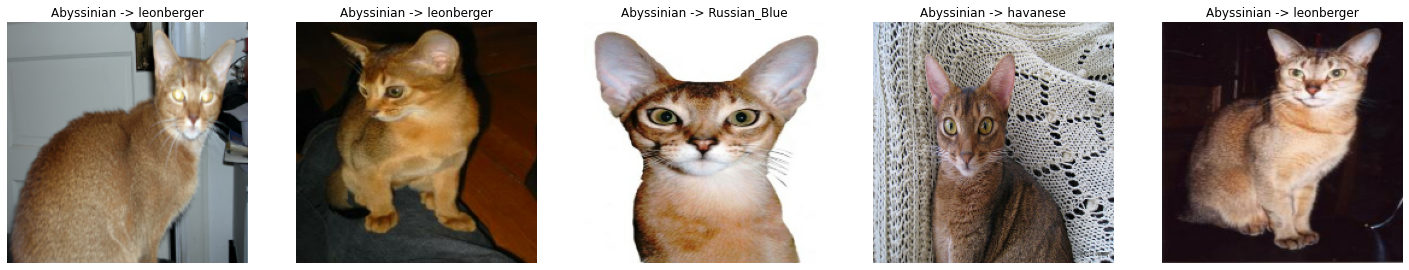

In [205]:
# Displaying wrong classification
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 15))

for i, (img, true_labels, predicted_labels) in enumerate(wrong_classification[:5]):
    axes[i].imshow(img)
    axes[i].set_title(f"{true_labels} -> {predicted_labels}")
    axes[i].set_axis_off()
    
plt.show()


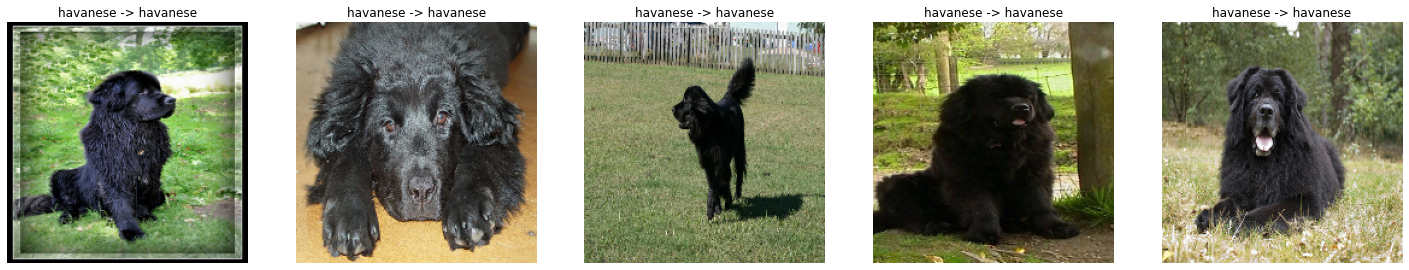

In [206]:
# Displaying Correct classification
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 15))

for i, (img, label, predicted_label) in enumerate(correct_classification[:5]):
    axes[i].imshow(img)
    axes[i].set_title(f"{label} -> {predicted_label}")
    axes[i].set_axis_off()
    
plt.show()

## Task 3 (5 marks) - A more complex classifier

Implement a more complex classifier that incorporates convolutions and max pooling. You need to decide an optimal combination of layers and choice of parameters. The task will be composed of the following subtasks.

### 3.1 (2 marks)

Implement a model that includes a sequence of two `Conv2D`, each one followed with `MaxPooling2D`. Use reasonable numbers for the hyperparameters (number of filters, kernel size, pool size, activation), based on what we have seen in the lectures.

Train the model with the training data and use the validation data to determine when to stop training. Determine whether and when it is overfitting, and report on the evaluation results with the test data.

In [210]:
def Convolution_model():
    # Define the model architecture
    model = models.Sequential()
    model.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu", input_shape=(200, 200, 3)))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu"))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(37, activation="softmax"))
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    
    
    # Return the model
    return model


In [212]:
basic_conv_model = Convolution_model()
basic_conv_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 99, 99, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 97, 97, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 48, 48, 64)       0         
 2D)                                                             
                                                                 
 flatten_5 (Flatten)         (None, 147456)            0         
                                                                 
 dense_8 (Dense)             (None, 37)               

In [215]:
#Fit the model
# Train the model and store the history
Conv_model_hist = basic_conv_model.fit(training, validation_data=validation, epochs=20, 
                        callbacks=tf.keras.callbacks.EarlyStopping(monitor='loss', patience=5))
    

Epoch 1/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 104s 1s/step - loss: 3.6949 - accuracy: 0.0630 - val_loss: 3.4247 - val_accuracy: 0.0966
Epoch 2/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 101s 1s/step - loss: 2.8020 - accuracy: 0.2549 - val_loss: 3.3395 - val_accuracy: 0.1272
Epoch 3/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 107s 1s/step - loss: 1.3975 - accuracy: 0.6495 - val_loss: 3.9212 - val_accuracy: 0.1326
Epoch 4/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 94s 1s/step - loss: 0.3107 - accuracy: 0.9342 - val_loss: 4.9493 - val_accuracy: 0.1321
Epoch 5/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 95s 1s/step - loss: 0.0553 - accuracy: 0.9932 - val_loss: 5.5826 - val_accuracy: 0.1272
Epoch 6/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 99s 1s/step - loss: 0.0139 - accuracy: 0.9989 - val_loss: 6.2814 - val_accuracy: 0.1250
Epoch 7/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 92s 1s/step - loss: 0.0037 - accuracy: 1.0000 - val_loss: 6.5049 - val_accuracy: 0.1354
Epoch 8/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 89s 1s/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 6.7387 - val_accuracy: 0.1294
Epoch 9/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 91s 1s/step - loss: 0.0014 - accuracy: 1.0000 - val_loss: 6.8413 - val_accuracy: 0.1354
Epoch 10/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 91s 1s/step - loss: 0.0011 - accuracy: 1.0000 - val_loss: 6.9385 - val_accuracy: 0.1337
Epoch 11/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 90s 1s/step - loss: 8.7053e-04 - accuracy: 1.0000 - val_loss: 7.0277 - val_accuracy: 0.1337
Epoch 12/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 90s 1s/step - loss: 7.2883e-04 - accuracy: 1.0000 - val_loss: 7.1214 - val_accuracy: 0.1337
Epoch 13/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 87s 1s/step - loss: 6.2007e-04 - accuracy: 1.0000 - val_loss: 7.1911 - val_accuracy: 0.1365
Epoch 14/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 2615s 36s/step - loss: 5.3636e-04 - accuracy: 1.0000 - val_loss: 7.2526 - val_accuracy: 0.1337
Epoch 15/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 1487s 20s/step - loss: 4.6556e-04 - accuracy: 1.0000 - val_loss: 7.3263 - val_accuracy: 0.1376
Epoch 16/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 1468s 20s/step - loss: 4.0858e-04 - accuracy: 1.0000 - val_loss: 7.3790 - val_accuracy: 0.1376
Epoch 17/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
2023-04-28 09:33:14.367065: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1110 of 10000
2023-04-28 09:33:24.358389: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2351 of 10000
2023-04-28 09:33:34.344435: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 3305 of 10000
2023-04-28 09:33:35.945195: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


74/74 [==============================] - 1781s 24s/step - loss: 3.6343e-04 - accuracy: 1.0000 - val_loss: 7.4335 - val_accuracy: 0.1376
Epoch 18/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 1497s 20s/step - loss: 3.2270e-04 - accuracy: 1.0000 - val_loss: 7.4989 - val_accuracy: 0.1359
Epoch 19/20


2023-04-28 10:32:18.464072: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 172 of 10000
2023-04-28 10:32:18.464212: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 173 of 10000
2023-04-28 10:32:18.464235: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 174 of 10000
2023-04-28 10:32:18.464246: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 175 of 10000
2023-04-28 10:32:18.464258: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 176 of 10000
2023-04-28 10:32:18.464267: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 177 of 10000
2023-04-28 10:32:18.467027: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shu

74/74 [==============================] - 1739s 20s/step - loss: 2.9008e-04 - accuracy: 1.0000 - val_loss: 7.5380 - val_accuracy: 0.1376
Epoch 20/20


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
2023-04-28 10:56:52.352203: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1036 of 10000
2023-04-28 10:57:02.373519: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2246 of 10000
2023-04-28 10:57:12.396867: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 3089 of 10000
2023-04-28 10:57:18.563971: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


74/74 [==============================] - 1791s 24s/step - loss: 2.6224e-04 - accuracy: 1.0000 - val_loss: 7.5937 - val_accuracy: 0.1359


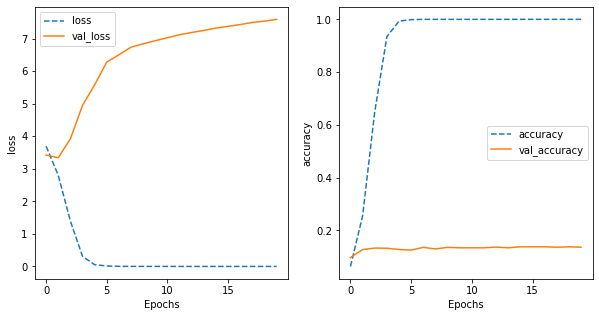

In [221]:
# Using the helper function from the lecture to plot the accuracy and loss
training_plot(['loss', 'accuracy'], Conv_model_hist)

## Analysing the convolution model

Beginning from epoch 3, the model starts to overfit. As the number of epochs increases, the training accuracy continues to rise while the training loss decreases. However, the validation loss starts to increase, and there is only minimal improvement in the validation accuracy. These results are indicative of overfitting.

The model has picked up certain features in the training dataset that enable it to classify the training data well, but it does not perform well on the validation set. This is a classic symptom of overfitting, where the model becomes too specialized to the training data and does not generalize well to new data.

### 3.2 (1 mark)

Try to improve on the above results by using a more complex architecture of your choice. In your solution, you must design the architecture from scratch (do not use a pre-trained model). Comment on the results. Compare with the best model of task 2.

## Improved more complex model 

1. Two 2D convolutional layers with 32 filters each, a kernel size of 3, a ReLU activation function, and "same" padding to maintain the input size.
2. A max pooling layer with a pool size of 2.
3. Two more 2D convolutional layers with 64 filters each, a kernel size of 3, a ReLU activation function, and "same" padding.
4. Another max pooling layer with a pool size of 2.
5. Two additional 2D convolutional layers with 128 filters each, a kernel size of 3, a ReLU activation function, and "same" padding.
6. A max pooling layer with a pool size of 2.
7. A flatten layer to flatten the output from the previous layer into a 1D vector.
8. Two dense layers, each with 256 nodes and a ReLU activation function.
9. A final dense layer with 37 output nodes and a softmax activation function.

In [216]:
def Complex_model():
    # Define the model architecture
    model = models.Sequential()
    model.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same", input_shape=(200, 200, 3)))
    model.add(layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding="same"))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"))
    model.add(layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding="same"))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"))
    model.add(layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding="same"))
    model.add(layers.MaxPooling2D(pool_size=2))
    model.add(layers.Flatten())
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(256, activation="relu"))
    model.add(layers.Dense(37, activation="softmax"))
    
    # Compile the model
    model.compile(optimizer='adam',
                  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
                  metrics=['accuracy'])
    
    # Return the model
    return model


In [217]:
complex_model = Complex_model()

In [220]:
complex_history = complex_model.fit(training, validation_data=validation, epochs=10, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3))

Epoch 1/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 395s 5s/step - loss: 3.6135 - accuracy: 0.0223 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 2/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 324s 4s/step - loss: 3.6113 - accuracy: 0.0228 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 3/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 990s 13s/step - loss: 3.6112 - accuracy: 0.0258 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 4/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 360s 5s/step - loss: 3.6112 - accuracy: 0.0220 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 5/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 356s 5s/step - loss: 3.6113 - accuracy: 0.0204 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 6/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 339s 4s/step - loss: 3.6112 - accuracy: 0.0207 - val_loss: 3.6109 - val_accuracy: 0.0240
Epoch 7/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 2278s 31s/step - loss: 3.6112 - accuracy: 0.0212 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 8/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 375s 5s/step - loss: 3.6112 - accuracy: 0.0198 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 9/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 379s 5s/step - loss: 3.6112 - accuracy: 0.0228 - val_loss: 3.6109 - val_accuracy: 0.0273
Epoch 10/10


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 389s 5s/step - loss: 3.6112 - accuracy: 0.0217 - val_loss: 3.6109 - val_accuracy: 0.0273


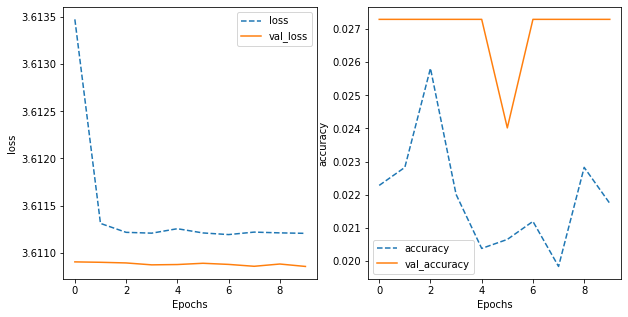

In [222]:
# Using the helper function from the lecture to plot the accuracy and loss
training_plot(['loss', 'accuracy'], complex_history)

## Analysing the complex model

Although additional layers were added to the model in an attempt to improve its performance, the results indicate that it did not perform well. During training, the training loss decreased after the first epoch and remained almost constant, which is similar to the validation loss. Meanwhile, the training accuracy showed fluctuations, and the validation accuracy remained relatively constant except for epoch 5.

These observations suggest that the model may not be complex enough to learn the underlying patterns in the data, or that the hyperparameters need to be adjusted to achieve better results. Another possibility is that the model is suffering from underfitting, where it is unable to capture the complexity of the data, leading to poor performance.

### 3.3 (1 mark)

Use MobileNet, pre-trained on imagenet as discussed in the lectures. Add the correct classification layer, and train it with your data. During training, make sure that you freeze the pre-trained weights. Make sure that you use a reasonable schedule for the learning rate. Evaluate and compare with other systems.

## Note

In the following two tasks the metric sparse_categorical accuracy was used earlier but the kernel restarted and the output was lost. Therefore the prior output where "accuracy" was used is provided as submission due to lack of computational resources. The analysis is conducted on sparse_categorical_accuracy


Learning rate schedule: 1e-05 to 5e-05 to 1e-05


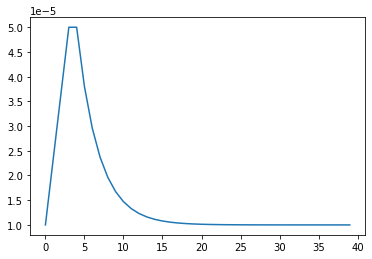

In [223]:
EPOCHS = 40
LR_START = 1e-5
LR_MAX = 5e-5
LR_MIN = 1e-5
LR_RAMPUP = 3
LR_SUSTAIN = 1
LR_DECAY = 0.7

def lr_schedule(epoch):
    if epoch < LR_RAMPUP:
        lr = (LR_MAX - LR_START) / LR_RAMPUP * epoch + LR_START
    elif epoch < LR_RAMPUP + LR_SUSTAIN:
        lr = LR_MAX
    else:
        lr = (LR_MAX - LR_MIN) * LR_DECAY**(epoch - LR_RAMPUP - LR_SUSTAIN) + LR_MIN
    return lr

lr_callback = tf.keras.callbacks.LearningRateScheduler(lr_schedule, verbose=True)

rng = [i for i in range(EPOCHS)]
y = [lr_schedule(x) for x in rng]
plt.plot(rng, y)
print("Learning rate schedule: {:.3g} to {:.3g} to {:.3g}".format(y[0], max(y), y[-1]))


In [226]:
# Load pre-trained MobileNet model with weights trained on ImageNet
base_model = tf.keras.applications.MobileNet(input_shape=(200, 200, 3),
                                             weights='imagenet',
                                             include_top=False,
                                             pooling='avg')

# Freeze pre-trained weights in the base model
for layer in base_model.layers:
    layer.trainable = False

# Add a new output layer to the model
outputs = tf.keras.layers.Dense(37, activation='softmax')(base_model.output)

# Define the complete model with input from the base model and output from the new layer
model = tf.keras.Model(inputs=base_model.input, outputs=outputs)

# Compile the model with the Adam optimizer and sparse categorical cross-entropy loss function
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['sparse_categorical_accuracy'])

# Print the model architecture
model.summary()

# Train the model with the learning rate schedule and early stopping callbacks
history = model.fit(training,
                    validation_data=validation,
                    epochs=40,
                    callbacks=[lr_callback,
                               tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                               patience=3)])



Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 100, 100, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 100, 100, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 100, 100, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 100, 100, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 100, 100, 32)     128       
 ation)                                                    

                                                                 
 conv_pw_8 (Conv2D)          (None, 12, 12, 512)       262144    
                                                                 
 conv_pw_8_bn (BatchNormaliz  (None, 12, 12, 512)      2048      
 ation)                                                          
                                                                 
 conv_pw_8_relu (ReLU)       (None, 12, 12, 512)       0         
                                                                 
 conv_dw_9 (DepthwiseConv2D)  (None, 12, 12, 512)      4608      
                                                                 
 conv_dw_9_bn (BatchNormaliz  (None, 12, 12, 512)      2048      
 ation)                                                          
                                                                 
 conv_dw_9_relu (ReLU)       (None, 12, 12, 512)       0         
                                                                 
 conv_pw_9

Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 90s 1s/step - loss: 4.5559 - sparse_categorical_accuracy: 0.0280 - val_loss: 4.4200 - val_sparse_categorical_accuracy: 0.0284 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 2.3333333333333336e-05.
Epoch 2/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 88s 1s/step - loss: 4.2469 - sparse_categorical_accuracy: 0.0353 - val_loss: 4.0609 - val_sparse_categorical_accuracy: 0.0344 - lr: 2.3333e-05

Epoch 3: LearningRateScheduler setting learning rate to 3.666666666666667e-05.
Epoch 3/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 86s 1s/step - loss: 3.8641 - sparse_categorical_accuracy: 0.0584 - val_loss: 3.6685 - val_sparse_categorical_accuracy: 0.0644 - lr: 3.6667e-05

Epoch 4: LearningRateScheduler setting learning rate to 5e-05.
Epoch 4/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 84s 1s/step - loss: 3.4289 - sparse_categorical_accuracy: 0.1035 - val_loss: 3.2248 - val_sparse_categorical_accuracy: 0.1228 - lr: 5.0000e-05

Epoch 5: LearningRateScheduler setting learning rate to 5e-05.
Epoch 5/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 86s 1s/step - loss: 2.9921 - sparse_categorical_accuracy: 0.1802 - val_loss: 2.8477 - val_sparse_categorical_accuracy: 0.2052 - lr: 5.0000e-05

Epoch 6: LearningRateScheduler setting learning rate to 3.8e-05.
Epoch 6/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 88s 1s/step - loss: 2.6582 - sparse_categorical_accuracy: 0.2685 - val_loss: 2.6009 - val_sparse_categorical_accuracy: 0.2757 - lr: 3.8000e-05

Epoch 7: LearningRateScheduler setting learning rate to 2.96e-05.
Epoch 7/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 78s 981ms/step - loss: 2.4317 - sparse_categorical_accuracy: 0.3310 - val_loss: 2.4305 - val_sparse_categorical_accuracy: 0.3248 - lr: 2.9600e-05

Epoch 8: LearningRateScheduler setting learning rate to 2.3719999999999997e-05.
Epoch 8/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 81s 1s/step - loss: 2.2704 - sparse_categorical_accuracy: 0.3826 - val_loss: 2.3053 - val_sparse_categorical_accuracy: 0.3646 - lr: 2.3720e-05

Epoch 9: LearningRateScheduler setting learning rate to 1.9603999999999997e-05.
Epoch 9/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 77s 971ms/step - loss: 2.1496 - sparse_categorical_accuracy: 0.4253 - val_loss: 2.2085 - val_sparse_categorical_accuracy: 0.3990 - lr: 1.9604e-05

Epoch 10: LearningRateScheduler setting learning rate to 1.67228e-05.
Epoch 10/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 79s 1s/step - loss: 2.0544 - sparse_categorical_accuracy: 0.4530 - val_loss: 2.1311 - val_sparse_categorical_accuracy: 0.4274 - lr: 1.6723e-05

Epoch 11: LearningRateScheduler setting learning rate to 1.470596e-05.
Epoch 11/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 74s 945ms/step - loss: 1.9766 - sparse_categorical_accuracy: 0.4791 - val_loss: 2.0658 - val_sparse_categorical_accuracy: 0.4465 - lr: 1.4706e-05

Epoch 12: LearningRateScheduler setting learning rate to 1.3294171999999999e-05.
Epoch 12/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 75s 959ms/step - loss: 1.9106 - sparse_categorical_accuracy: 0.4997 - val_loss: 2.0092 - val_sparse_categorical_accuracy: 0.4645 - lr: 1.3294e-05

Epoch 13: LearningRateScheduler setting learning rate to 1.23059204e-05.
Epoch 13/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 75s 952ms/step - loss: 1.8527 - sparse_categorical_accuracy: 0.5168 - val_loss: 1.9596 - val_sparse_categorical_accuracy: 0.4782 - lr: 1.2306e-05

Epoch 14: LearningRateScheduler setting learning rate to 1.161414428e-05.
Epoch 14/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 92s 1s/step - loss: 1.8005 - sparse_categorical_accuracy: 0.5334 - val_loss: 1.9141 - val_sparse_categorical_accuracy: 0.4956 - lr: 1.1614e-05

Epoch 15: LearningRateScheduler setting learning rate to 1.1129900996e-05.
Epoch 15/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 96s 1s/step - loss: 1.7529 - sparse_categorical_accuracy: 0.5454 - val_loss: 1.8719 - val_sparse_categorical_accuracy: 0.5093 - lr: 1.1130e-05

Epoch 16: LearningRateScheduler setting learning rate to 1.07909306972e-05.
Epoch 16/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 87s 1s/step - loss: 1.7087 - sparse_categorical_accuracy: 0.5579 - val_loss: 1.8328 - val_sparse_categorical_accuracy: 0.5213 - lr: 1.0791e-05

Epoch 17: LearningRateScheduler setting learning rate to 1.055365148804e-05.
Epoch 17/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 88s 1s/step - loss: 1.6670 - sparse_categorical_accuracy: 0.5704 - val_loss: 1.7957 - val_sparse_categorical_accuracy: 0.5311 - lr: 1.0554e-05

Epoch 18: LearningRateScheduler setting learning rate to 1.0387556041628e-05.
Epoch 18/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 94s 1s/step - loss: 1.6277 - sparse_categorical_accuracy: 0.5837 - val_loss: 1.7606 - val_sparse_categorical_accuracy: 0.5393 - lr: 1.0388e-05

Epoch 19: LearningRateScheduler setting learning rate to 1.0271289229139601e-05.
Epoch 19/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 100s 1s/step - loss: 1.5899 - sparse_categorical_accuracy: 0.5946 - val_loss: 1.7268 - val_sparse_categorical_accuracy: 0.5453 - lr: 1.0271e-05

Epoch 20: LearningRateScheduler setting learning rate to 1.018990246039772e-05.
Epoch 20/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 88s 1s/step - loss: 1.5536 - sparse_categorical_accuracy: 0.6101 - val_loss: 1.6942 - val_sparse_categorical_accuracy: 0.5551 - lr: 1.0190e-05

Epoch 21: LearningRateScheduler setting learning rate to 1.0132931722278405e-05.
Epoch 21/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 90s 1s/step - loss: 1.5189 - sparse_categorical_accuracy: 0.6201 - val_loss: 1.6629 - val_sparse_categorical_accuracy: 0.5655 - lr: 1.0133e-05

Epoch 22: LearningRateScheduler setting learning rate to 1.0093052205594883e-05.
Epoch 22/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 78s 980ms/step - loss: 1.4856 - sparse_categorical_accuracy: 0.6299 - val_loss: 1.6330 - val_sparse_categorical_accuracy: 0.5742 - lr: 1.0093e-05

Epoch 23: LearningRateScheduler setting learning rate to 1.0065136543916418e-05.
Epoch 23/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 77s 972ms/step - loss: 1.4534 - sparse_categorical_accuracy: 0.6397 - val_loss: 1.6043 - val_sparse_categorical_accuracy: 0.5808 - lr: 1.0065e-05

Epoch 24: LearningRateScheduler setting learning rate to 1.0045595580741493e-05.
Epoch 24/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 86s 1s/step - loss: 1.4222 - sparse_categorical_accuracy: 0.6516 - val_loss: 1.5763 - val_sparse_categorical_accuracy: 0.5868 - lr: 1.0046e-05

Epoch 25: LearningRateScheduler setting learning rate to 1.0031916906519046e-05.
Epoch 25/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 82s 1s/step - loss: 1.3922 - sparse_categorical_accuracy: 0.6601 - val_loss: 1.5496 - val_sparse_categorical_accuracy: 0.5939 - lr: 1.0032e-05

Epoch 26: LearningRateScheduler setting learning rate to 1.0022341834563332e-05.
Epoch 26/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 87s 1s/step - loss: 1.3632 - sparse_categorical_accuracy: 0.6674 - val_loss: 1.5233 - val_sparse_categorical_accuracy: 0.6026 - lr: 1.0022e-05

Epoch 27: LearningRateScheduler setting learning rate to 1.0015639284194332e-05.
Epoch 27/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 85s 1s/step - loss: 1.3351 - sparse_categorical_accuracy: 0.6745 - val_loss: 1.4980 - val_sparse_categorical_accuracy: 0.6092 - lr: 1.0016e-05

Epoch 28: LearningRateScheduler setting learning rate to 1.0010947498936033e-05.
Epoch 28/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 81s 1s/step - loss: 1.3078 - sparse_categorical_accuracy: 0.6832 - val_loss: 1.4736 - val_sparse_categorical_accuracy: 0.6124 - lr: 1.0011e-05

Epoch 29: LearningRateScheduler setting learning rate to 1.0007663249255223e-05.
Epoch 29/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 87s 1s/step - loss: 1.2817 - sparse_categorical_accuracy: 0.6894 - val_loss: 1.4501 - val_sparse_categorical_accuracy: 0.6206 - lr: 1.0008e-05

Epoch 30: LearningRateScheduler setting learning rate to 1.0005364274478657e-05.
Epoch 30/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 81s 1s/step - loss: 1.2561 - sparse_categorical_accuracy: 0.7003 - val_loss: 1.4273 - val_sparse_categorical_accuracy: 0.6239 - lr: 1.0005e-05

Epoch 31: LearningRateScheduler setting learning rate to 1.000375499213506e-05.
Epoch 31/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 86s 1s/step - loss: 1.2314 - sparse_categorical_accuracy: 0.7049 - val_loss: 1.4053 - val_sparse_categorical_accuracy: 0.6310 - lr: 1.0004e-05

Epoch 32: LearningRateScheduler setting learning rate to 1.0002628494494543e-05.
Epoch 32/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 83s 1s/step - loss: 1.2075 - sparse_categorical_accuracy: 0.7125 - val_loss: 1.3838 - val_sparse_categorical_accuracy: 0.6343 - lr: 1.0003e-05

Epoch 33: LearningRateScheduler setting learning rate to 1.000183994614618e-05.
Epoch 33/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 77s 972ms/step - loss: 1.1844 - sparse_categorical_accuracy: 0.7171 - val_loss: 1.3633 - val_sparse_categorical_accuracy: 0.6386 - lr: 1.0002e-05

Epoch 34: LearningRateScheduler setting learning rate to 1.0001287962302327e-05.
Epoch 34/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 77s 986ms/step - loss: 1.1623 - sparse_categorical_accuracy: 0.7228 - val_loss: 1.3434 - val_sparse_categorical_accuracy: 0.6436 - lr: 1.0001e-05

Epoch 35: LearningRateScheduler setting learning rate to 1.0000901573611629e-05.
Epoch 35/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 90s 1s/step - loss: 1.1404 - sparse_categorical_accuracy: 0.7302 - val_loss: 1.3240 - val_sparse_categorical_accuracy: 0.6490 - lr: 1.0001e-05

Epoch 36: LearningRateScheduler setting learning rate to 1.000063110152814e-05.
Epoch 36/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 101s 1s/step - loss: 1.1195 - sparse_categorical_accuracy: 0.7361 - val_loss: 1.3055 - val_sparse_categorical_accuracy: 0.6545 - lr: 1.0001e-05

Epoch 37: LearningRateScheduler setting learning rate to 1.0000441771069698e-05.
Epoch 37/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 91s 1s/step - loss: 1.0992 - sparse_categorical_accuracy: 0.7408 - val_loss: 1.2871 - val_sparse_categorical_accuracy: 0.6561 - lr: 1.0000e-05

Epoch 38: LearningRateScheduler setting learning rate to 1.0000309239748789e-05.
Epoch 38/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 98s 1s/step - loss: 1.0793 - sparse_categorical_accuracy: 0.7467 - val_loss: 1.2694 - val_sparse_categorical_accuracy: 0.6605 - lr: 1.0000e-05

Epoch 39: LearningRateScheduler setting learning rate to 1.0000216467824152e-05.
Epoch 39/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 93s 1s/step - loss: 1.0603 - sparse_categorical_accuracy: 0.7524 - val_loss: 1.2525 - val_sparse_categorical_accuracy: 0.6638 - lr: 1.0000e-05

Epoch 40: LearningRateScheduler setting learning rate to 1.0000151527476907e-05.
Epoch 40/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 89s 1s/step - loss: 1.0417 - sparse_categorical_accuracy: 0.7609 - val_loss: 1.2360 - val_sparse_categorical_accuracy: 0.6670 - lr: 1.0000e-05


KeyError: 'accuracy'

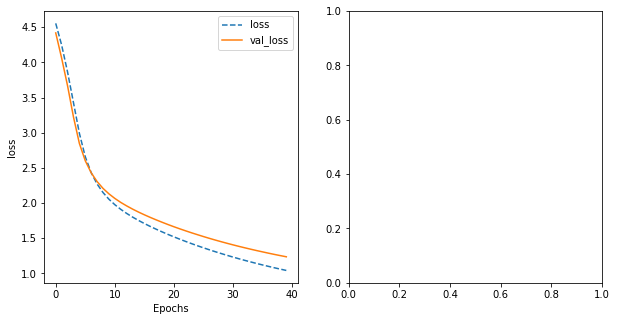

In [228]:
#Plotting the loss and accuracy
training_plot(['loss', 'accuracy'], history)

## Analysing the pre trained model
Utilizing a pre-trained model, specifically MobileNet, results in significant improvements in performance compared to previous models. Across the 40 epochs, both training and validation losses steadily decrease, while training and validation accuracy increase in each epoch. 

The limited size of the dataset used in this assignment explains why the model performs substantially better when a pre-trained model is utilized. The previous models lacked adequate training data to grasp the features of the dataset. The small validation dataset also hindered the model from receiving quality feedback, while the small testing dataset restricted the model's true performance evaluation.

### 3.4 (1 mark)

Add a data augmentation stage to the model implemented in 3.3 and compare results vs. 3.3. In a Markdown text cell, justify the choice of data augmentation layers and their parameters.

In [227]:
# Define the data augmentation pipeline
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.2)
])

# Build the model architecture
inputs = tf.keras.Input(shape=(200,200,3))
x = data_augmentation(inputs)
x = tf.keras.applications.MobileNet(input_tensor=x, weights="imagenet", include_top=False, pooling="avg")(x)
outputs = tf.keras.layers.Dense(37, activation="softmax")(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

# Compile the model
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["sparse_categorical_accuracy"])

# Print the model architecture summary
model.summary()

# Train the model
history_aug = model.fit(training,
                         validation_data=validation,
                         epochs=40,
                         callbacks=[lr_callback,
                                    tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=3)])


Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 200, 200, 3)]     0         
                                                                 
 sequential_7 (Sequential)   (None, 200, 200, 3)       0         
                                                                 
 mobilenet_1.00_224 (Functio  (None, 1024)             3228864   
 nal)                                                            
                                                                 
 dense_15 (Dense)            (None, 37)                37925     
                                                                 
Total params: 3,266,789
Trainable params: 3,244,901
Non-trainable params: 21,888
_________________________________________________________________

Epoch 1: LearningRateScheduler setting learning rate to 1e-05.
Epoch 1/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 403s 5s/step - loss: 3.9959 - sparse_categorical_accuracy: 0.0527 - val_loss: 3.7393 - val_sparse_categorical_accuracy: 0.0797 - lr: 1.0000e-05

Epoch 2: LearningRateScheduler setting learning rate to 2.3333333333333336e-05.
Epoch 2/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
2023-04-29 07:25:24.559957: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2750 of 10000
2023-04-29 07:25:26.542734: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


74/74 [==============================] - 536s 7s/step - loss: 3.0949 - sparse_categorical_accuracy: 0.1851 - val_loss: 2.6208 - val_sparse_categorical_accuracy: 0.2784 - lr: 2.3333e-05

Epoch 3: LearningRateScheduler setting learning rate to 3.666666666666667e-05.
Epoch 3/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 433s 6s/step - loss: 2.0568 - sparse_categorical_accuracy: 0.4647 - val_loss: 1.7072 - val_sparse_categorical_accuracy: 0.5437 - lr: 3.6667e-05

Epoch 4: LearningRateScheduler setting learning rate to 5e-05.
Epoch 4/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 276s 4s/step - loss: 1.3118 - sparse_categorical_accuracy: 0.6674 - val_loss: 1.2367 - val_sparse_categorical_accuracy: 0.6588 - lr: 5.0000e-05

Epoch 5: LearningRateScheduler setting learning rate to 5e-05.
Epoch 5/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 2884s 39s/step - loss: 0.9180 - sparse_categorical_accuracy: 0.7633 - val_loss: 1.0117 - val_sparse_categorical_accuracy: 0.7118 - lr: 5.0000e-05

Epoch 6: LearningRateScheduler setting learning rate to 3.8e-05.
Epoch 6/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 7562s 103s/step - loss: 0.7157 - sparse_categorical_accuracy: 0.8255 - val_loss: 0.9031 - val_sparse_categorical_accuracy: 0.7314 - lr: 3.8000e-05

Epoch 7: LearningRateScheduler setting learning rate to 2.96e-05.
Epoch 7/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 5043s 69s/step - loss: 0.6134 - sparse_categorical_accuracy: 0.8467 - val_loss: 0.8351 - val_sparse_categorical_accuracy: 0.7516 - lr: 2.9600e-05

Epoch 8: LearningRateScheduler setting learning rate to 2.3719999999999997e-05.
Epoch 8/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 8498s 116s/step - loss: 0.5630 - sparse_categorical_accuracy: 0.8668 - val_loss: 0.7872 - val_sparse_categorical_accuracy: 0.7686 - lr: 2.3720e-05

Epoch 9: LearningRateScheduler setting learning rate to 1.9603999999999997e-05.
Epoch 9/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 795s 11s/step - loss: 0.5108 - sparse_categorical_accuracy: 0.8712 - val_loss: 0.7609 - val_sparse_categorical_accuracy: 0.7773 - lr: 1.9604e-05

Epoch 10: LearningRateScheduler setting learning rate to 1.67228e-05.
Epoch 10/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
2023-04-29 14:39:11.230865: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 1266 of 10000
2023-04-29 14:39:21.243333: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2470 of 10000
2023-04-29 14:39:31.266076: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 3586 of 10000
2023-04-29 14:39:32.364966: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


74/74 [==============================] - 851s 11s/step - loss: 0.4812 - sparse_categorical_accuracy: 0.8861 - val_loss: 0.7413 - val_sparse_categorical_accuracy: 0.7800 - lr: 1.6723e-05

Epoch 11: LearningRateScheduler setting learning rate to 1.470596e-05.
Epoch 11/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 256s 3s/step - loss: 0.4458 - sparse_categorical_accuracy: 0.8897 - val_loss: 0.7228 - val_sparse_categorical_accuracy: 0.7888 - lr: 1.4706e-05

Epoch 12: LearningRateScheduler setting learning rate to 1.3294171999999999e-05.
Epoch 12/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 255s 3s/step - loss: 0.4322 - sparse_categorical_accuracy: 0.8957 - val_loss: 0.7083 - val_sparse_categorical_accuracy: 0.7904 - lr: 1.3294e-05

Epoch 13: LearningRateScheduler setting learning rate to 1.23059204e-05.
Epoch 13/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 251s 3s/step - loss: 0.4121 - sparse_categorical_accuracy: 0.9035 - val_loss: 0.6931 - val_sparse_categorical_accuracy: 0.7926 - lr: 1.2306e-05

Epoch 14: LearningRateScheduler setting learning rate to 1.161414428e-05.
Epoch 14/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 253s 3s/step - loss: 0.3992 - sparse_categorical_accuracy: 0.9033 - val_loss: 0.6834 - val_sparse_categorical_accuracy: 0.7926 - lr: 1.1614e-05

Epoch 15: LearningRateScheduler setting learning rate to 1.1129900996e-05.
Epoch 15/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 332s 4s/step - loss: 0.3766 - sparse_categorical_accuracy: 0.9141 - val_loss: 0.6776 - val_sparse_categorical_accuracy: 0.7937 - lr: 1.1130e-05

Epoch 16: LearningRateScheduler setting learning rate to 1.07909306972e-05.
Epoch 16/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 9026s 124s/step - loss: 0.3747 - sparse_categorical_accuracy: 0.9106 - val_loss: 0.6705 - val_sparse_categorical_accuracy: 0.7969 - lr: 1.0791e-05

Epoch 17: LearningRateScheduler setting learning rate to 1.055365148804e-05.
Epoch 17/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 23328s 319s/step - loss: 0.3448 - sparse_categorical_accuracy: 0.9166 - val_loss: 0.6678 - val_sparse_categorical_accuracy: 0.7969 - lr: 1.0554e-05

Epoch 18: LearningRateScheduler setting learning rate to 1.0387556041628e-05.
Epoch 18/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
2023-04-30 00:15:03.359996: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 3259 of 10000
2023-04-30 00:15:04.424925: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


74/74 [==============================] - 1100s 15s/step - loss: 0.3335 - sparse_categorical_accuracy: 0.9226 - val_loss: 0.6616 - val_sparse_categorical_accuracy: 0.7991 - lr: 1.0388e-05

Epoch 19: LearningRateScheduler setting learning rate to 1.0271289229139601e-05.
Epoch 19/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 840s 11s/step - loss: 0.3285 - sparse_categorical_accuracy: 0.9228 - val_loss: 0.6531 - val_sparse_categorical_accuracy: 0.7997 - lr: 1.0271e-05

Epoch 20: LearningRateScheduler setting learning rate to 1.018990246039772e-05.
Epoch 20/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9
2023-04-30 00:47:23.777867: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:392] Filling up shuffle buffer (this may take a while): 2261 of 10000
2023-04-30 00:47:29.239306: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:417] Shuffle buffer filled.


74/74 [==============================] - 1135s 15s/step - loss: 0.3068 - sparse_categorical_accuracy: 0.9329 - val_loss: 0.6513 - val_sparse_categorical_accuracy: 0.7991 - lr: 1.0190e-05

Epoch 21: LearningRateScheduler setting learning rate to 1.0132931722278405e-05.
Epoch 21/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 321s 4s/step - loss: 0.3014 - sparse_categorical_accuracy: 0.9329 - val_loss: 0.6474 - val_sparse_categorical_accuracy: 0.7986 - lr: 1.0133e-05

Epoch 22: LearningRateScheduler setting learning rate to 1.0093052205594883e-05.
Epoch 22/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 275s 4s/step - loss: 0.3039 - sparse_categorical_accuracy: 0.9258 - val_loss: 0.6459 - val_sparse_categorical_accuracy: 0.8002 - lr: 1.0093e-05

Epoch 23: LearningRateScheduler setting learning rate to 1.0065136543916418e-05.
Epoch 23/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 541s 7s/step - loss: 0.2954 - sparse_categorical_accuracy: 0.9364 - val_loss: 0.6387 - val_sparse_categorical_accuracy: 0.8024 - lr: 1.0065e-05

Epoch 24: LearningRateScheduler setting learning rate to 1.0045595580741493e-05.
Epoch 24/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 319s 4s/step - loss: 0.2848 - sparse_categorical_accuracy: 0.9391 - val_loss: 0.6350 - val_sparse_categorical_accuracy: 0.8035 - lr: 1.0046e-05

Epoch 25: LearningRateScheduler setting learning rate to 1.0031916906519046e-05.
Epoch 25/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 331s 4s/step - loss: 0.2838 - sparse_categorical_accuracy: 0.9370 - val_loss: 0.6306 - val_sparse_categorical_accuracy: 0.8051 - lr: 1.0032e-05

Epoch 26: LearningRateScheduler setting learning rate to 1.0022341834563332e-05.
Epoch 26/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 360s 5s/step - loss: 0.2559 - sparse_categorical_accuracy: 0.9467 - val_loss: 0.6345 - val_sparse_categorical_accuracy: 0.8024 - lr: 1.0022e-05

Epoch 27: LearningRateScheduler setting learning rate to 1.0015639284194332e-05.
Epoch 27/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 334s 4s/step - loss: 0.2503 - sparse_categorical_accuracy: 0.9481 - val_loss: 0.6276 - val_sparse_categorical_accuracy: 0.8040 - lr: 1.0016e-05

Epoch 28: LearningRateScheduler setting learning rate to 1.0010947498936033e-05.
Epoch 28/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 303s 4s/step - loss: 0.2509 - sparse_categorical_accuracy: 0.9451 - val_loss: 0.6236 - val_sparse_categorical_accuracy: 0.8040 - lr: 1.0011e-05

Epoch 29: LearningRateScheduler setting learning rate to 1.0007663249255223e-05.
Epoch 29/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 333s 4s/step - loss: 0.2375 - sparse_categorical_accuracy: 0.9519 - val_loss: 0.6209 - val_sparse_categorical_accuracy: 0.8035 - lr: 1.0008e-05

Epoch 30: LearningRateScheduler setting learning rate to 1.0005364274478657e-05.
Epoch 30/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 299s 4s/step - loss: 0.2332 - sparse_categorical_accuracy: 0.9516 - val_loss: 0.6136 - val_sparse_categorical_accuracy: 0.8040 - lr: 1.0005e-05

Epoch 31: LearningRateScheduler setting learning rate to 1.000375499213506e-05.
Epoch 31/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 321s 4s/step - loss: 0.2221 - sparse_categorical_accuracy: 0.9527 - val_loss: 0.6084 - val_sparse_categorical_accuracy: 0.8095 - lr: 1.0004e-05

Epoch 32: LearningRateScheduler setting learning rate to 1.0002628494494543e-05.
Epoch 32/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 358s 5s/step - loss: 0.2302 - sparse_categorical_accuracy: 0.9486 - val_loss: 0.6030 - val_sparse_categorical_accuracy: 0.8100 - lr: 1.0003e-05

Epoch 33: LearningRateScheduler setting learning rate to 1.000183994614618e-05.
Epoch 33/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 314s 4s/step - loss: 0.2104 - sparse_categorical_accuracy: 0.9573 - val_loss: 0.5984 - val_sparse_categorical_accuracy: 0.8128 - lr: 1.0002e-05

Epoch 34: LearningRateScheduler setting learning rate to 1.0001287962302327e-05.
Epoch 34/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 333s 4s/step - loss: 0.2009 - sparse_categorical_accuracy: 0.9625 - val_loss: 0.5987 - val_sparse_categorical_accuracy: 0.8100 - lr: 1.0001e-05

Epoch 35: LearningRateScheduler setting learning rate to 1.0000901573611629e-05.
Epoch 35/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 271s 4s/step - loss: 0.2029 - sparse_categorical_accuracy: 0.9603 - val_loss: 0.5984 - val_sparse_categorical_accuracy: 0.8090 - lr: 1.0001e-05

Epoch 36: LearningRateScheduler setting learning rate to 1.000063110152814e-05.
Epoch 36/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 279s 4s/step - loss: 0.1967 - sparse_categorical_accuracy: 0.9628 - val_loss: 0.5969 - val_sparse_categorical_accuracy: 0.8128 - lr: 1.0001e-05

Epoch 37: LearningRateScheduler setting learning rate to 1.0000441771069698e-05.
Epoch 37/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 4158s 57s/step - loss: 0.1910 - sparse_categorical_accuracy: 0.9658 - val_loss: 0.5972 - val_sparse_categorical_accuracy: 0.8111 - lr: 1.0000e-05

Epoch 38: LearningRateScheduler setting learning rate to 1.0000309239748789e-05.
Epoch 38/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 331s 4s/step - loss: 0.1854 - sparse_categorical_accuracy: 0.9636 - val_loss: 0.5927 - val_sparse_categorical_accuracy: 0.8155 - lr: 1.0000e-05

Epoch 39: LearningRateScheduler setting learning rate to 1.0000216467824152e-05.
Epoch 39/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 387s 5s/step - loss: 0.1731 - sparse_categorical_accuracy: 0.9677 - val_loss: 0.5903 - val_sparse_categorical_accuracy: 0.8150 - lr: 1.0000e-05

Epoch 40: LearningRateScheduler setting learning rate to 1.0000151527476907e-05.
Epoch 40/40


Corrupt JPEG data: premature end of data segment
Corrupt JPEG data: 240 extraneous bytes before marker 0xd9


74/74 [==============================] - 306s 4s/step - loss: 0.1730 - sparse_categorical_accuracy: 0.9693 - val_loss: 0.5880 - val_sparse_categorical_accuracy: 0.8177 - lr: 1.0000e-05


KeyError: 'accuracy'

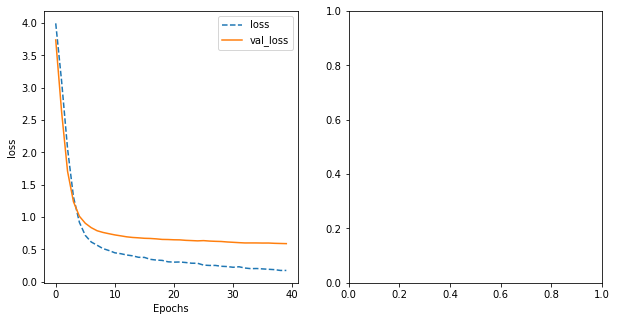

In [229]:
#Plotting the loss and accuracy
training_plot(['loss', 'accuracy'], history_aug)

## Analysis
The data augmentation layers chosen in this code snippet are RandomFlip, RandomRotation, and RandomZoom. The RandomFlip layer is useful because it can flip the input image horizontally, which can be particularly helpful when the training set lacks images of objects oriented in a particular direction. By randomly flipping the images horizontally, the model can learn to recognize objects regardless of their orientation.

The RandomRotation layer can randomly rotate the input image within a specified range, which can help the model generalize better to unseen data. In this case, the maximum rotation is set to 0.1 radians, which is approximately 5.7 degrees. This value was likely chosen to strike a balance between generating enough variability in the training data and avoiding overly aggressive transformations that could distort the image beyond recognition.

Finally, the RandomZoom layer randomly zooms into the input image within a specified range. In this case, the maximum zoom level is set to 20%. This layer can help the model recognize objects at different scales, which can improve its robustness to different input sizes.

Overall, these data augmentation layers and their parameters were likely chosen based on their ability to increase the diversity of the training set and improve the model's generalization performance on unseen data. The specific parameters were likely chosen through experimentation and tuning to optimize the model's performance on the specific task at hand.

# Coding (1 mark)

This mark will be assigned to submissions that have clean and efficient code and good in-code documentation of all code presented in this assignment.

# GitHub Classroom (1 mark)

These marks will be given to submissions that:

- Have continuously committed changes to the GitHub repository at GitHub Classroom.
- The commit messages are useful and informative.


# Submission

Your submission should consist of this Jupyter notebook with all your code and explanations inserted into the notebook as text cells. **The notebook should contain the output of the runs. All code should run. Code with syntax errors or code without output will not be assessed.**

**Do not submit multiple files. If you feel you need to submit multiple files, please contact Diego.Molla-Aliod@mq.edu.au first.**

Examine the text cells of this notebook so that you can have an idea of how to format text for good visual impact. You can also read this useful [guide to the MarkDown notation](https://daringfireball.net/projects/markdown/syntax), which explains the format of the text cells.

Each task specifies a number of marks. The final mark of the assignment is the sum of all the marks of each individual task.

By submitting this assignment you are acknowledging that this is your own work. Any submissions that break the code of academic honesty will be penalised as per [the academic integrity policy](https://policies.mq.edu.au/document/view.php?id=3).

## A note on the use of AI code generators

In this assignment, we view AI code generators such as copilot, CodeGPT, etc as tools that can help you write code quickly. You are allowed to use these tools. If you choose to use them, make the following explicit:
- What part of your code is based on the output of such tools, 
- What tools you used,
- What prompts you used to generate the code, and
- What modifications you made on the generated code.

This will help us assess your work fairly.

## Use of Chat GPT

The AI language chat gpt was used in various places to fix the code and indentation errors etc. There was not a perticular prompt or output that can be provided seprately but assisatnce was taken to complete the assignment.